# Softmax Classifier

https://m.blog.naver.com/ljh0326s/221230146706

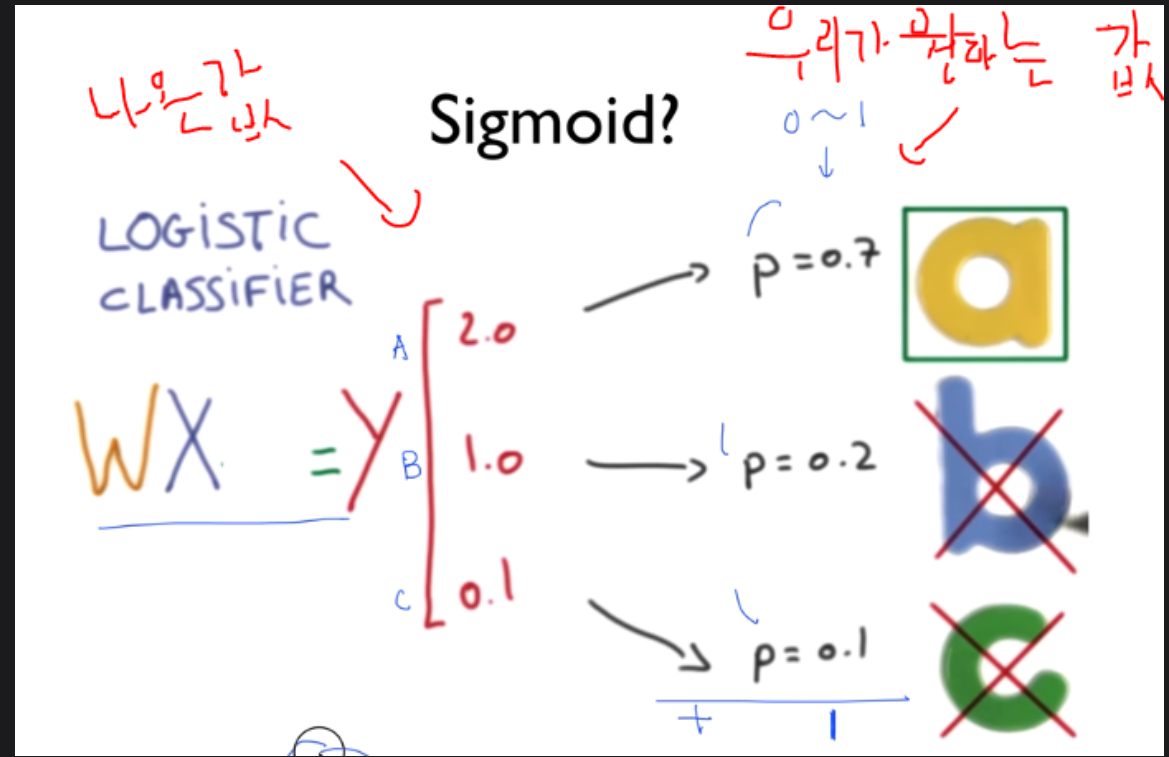

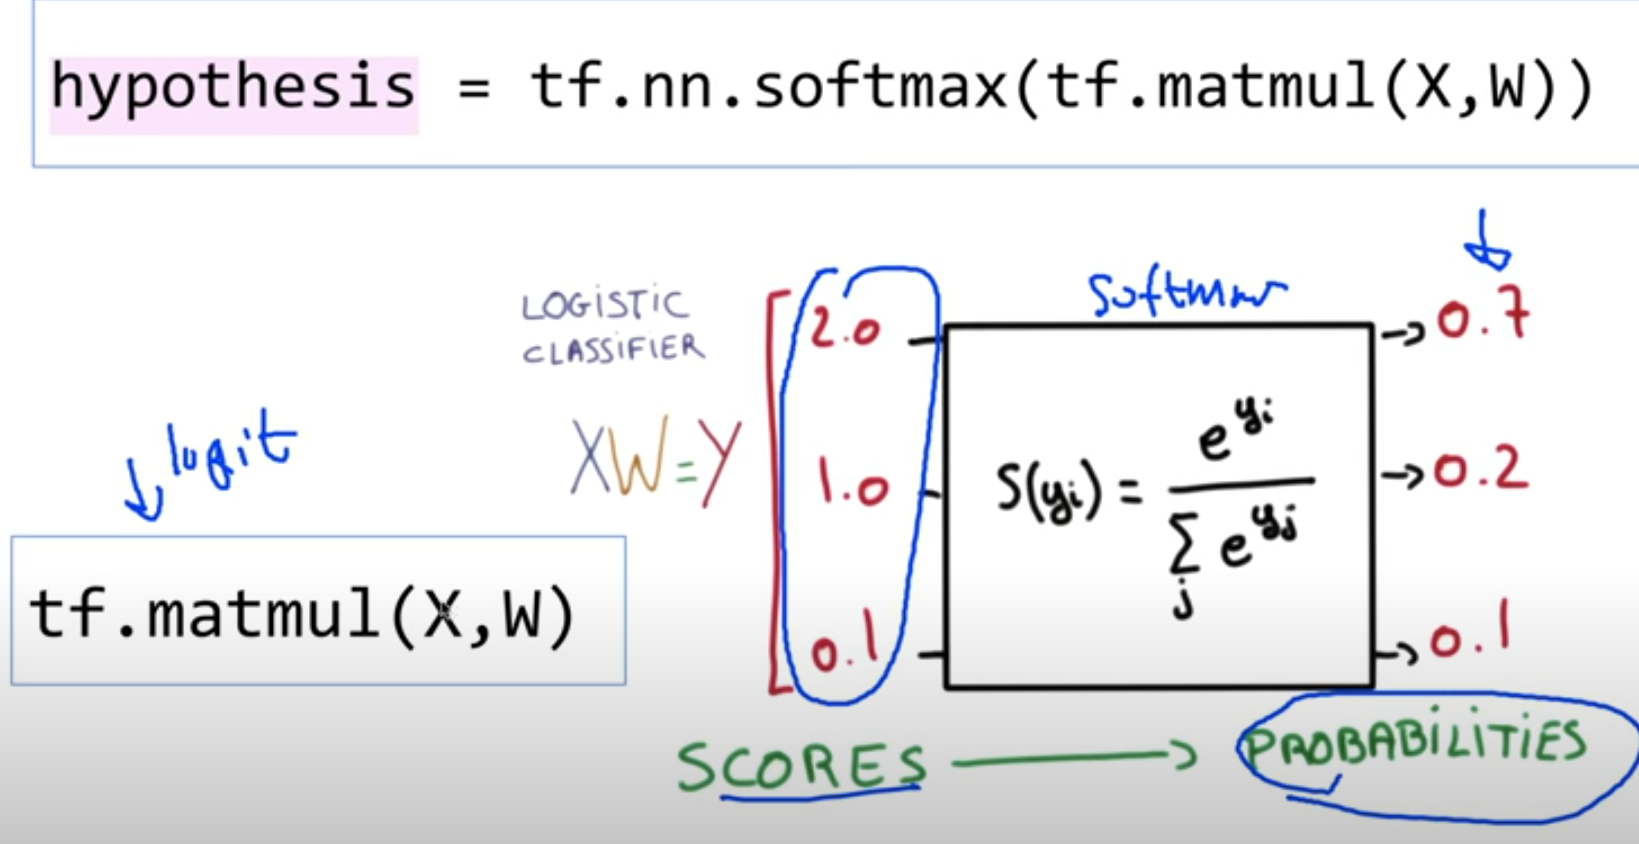

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b) 

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

                
    #Test&one-hot encoing 
    #소프트 맥스를 거친 가설을 인코딩하기.
    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))
#여러개~
    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 3.065816
200 0.58161813
400 0.4669883
600 0.37051487
800 0.2789153
1000 0.23107204
1200 0.20927456
1400 0.19118777
1600 0.1759176
1800 0.16285086
2000 0.15154473
--------------
[[1.9171266e-03 9.9807227e-01 1.0550830e-05]] [1]
--------------
[[0.9144325  0.0753207  0.01024673]] [0]
--------------
[[1.2659866e-08 3.4449701e-04 9.9965549e-01]] [2]
--------------
[[1.9171230e-03 9.9807227e-01 1.0550810e-05]
 [9.1443264e-01 7.5320676e-02 1.0246723e-02]
 [1.2659865e-08 3.4449701e-04 9.9965549e-01]] [1 0 2]


동물 분류

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)
print("one_hot:", y_one_hot)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=16, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_one_hot, epochs=1000)

# Single data test
test_data = np.array([[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]]) # expected prediction == 3 (feathers)
print(tf.model.predict(test_data), tf.model.predict_classes(test_data))

# Full x_data test
pred = tf.model.predict_classes(x_data)
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

Instructions for updating:
non-resource variables are not supported in the long term
(101, 16) (101, 1)
one_hot: [[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]

101/101 [==============================] - 0s 39us/sample - loss: 0.3300 - acc: 0.9109
Epoch 50/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.3276 - acc: 0.9406
Epoch 51/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.3196 - acc: 0.9406
Epoch 52/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.3169 - acc: 0.9307
Epoch 53/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.3179 - acc: 0.9505
Epoch 54/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.3081 - acc: 0.9406
Epoch 55/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.3039 - acc: 0.9406
Epoch 56/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.3016 - acc: 0.9307
Epoch 57/1000
101/101 [==============================] - 0s 52us/sample - loss: 0.2972 - acc: 0.9307
Epoch 58/1000
101/101 [==============================] - 0s 54us/sample - loss: 0.2964 - acc: 0.9307
Epoc

Epoch 130/1000
101/101 [==============================] - 0s 40us/sample - loss: 0.1681 - acc: 0.9901
Epoch 131/1000
101/101 [==============================] - 0s 52us/sample - loss: 0.1659 - acc: 0.9901
Epoch 132/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.1642 - acc: 0.9901
Epoch 133/1000
101/101 [==============================] - 0s 27us/sample - loss: 0.1638 - acc: 0.9901
Epoch 134/1000
101/101 [==============================] - 0s 59us/sample - loss: 0.1618 - acc: 0.9901
Epoch 135/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.1626 - acc: 0.9901
Epoch 136/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.1620 - acc: 0.9901
Epoch 137/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.1631 - acc: 0.9901
Epoch 138/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.1599 - acc: 0.9901
Epoch 139/1000
101/101 [==============================] - 0s 27us/sample - loss: 0

101/101 [==============================] - 0s 30us/sample - loss: 0.0863 - acc: 1.0000
Epoch 291/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0861 - acc: 1.0000
Epoch 292/1000
101/101 [==============================] - 0s 40us/sample - loss: 0.0860 - acc: 1.0000
Epoch 293/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0859 - acc: 1.0000
Epoch 294/1000
101/101 [==============================] - 0s 40us/sample - loss: 0.0853 - acc: 1.0000
Epoch 295/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0852 - acc: 1.0000
Epoch 296/1000
101/101 [==============================] - 0s 29us/sample - loss: 0.0844 - acc: 1.0000
Epoch 297/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0849 - acc: 1.0000
Epoch 298/1000
101/101 [==============================] - 0s 47us/sample - loss: 0.0850 - acc: 1.0000
Epoch 299/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0841 - acc: 1.

101/101 [==============================] - 0s 30us/sample - loss: 0.0590 - acc: 1.0000
Epoch 451/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0584 - acc: 1.0000
Epoch 452/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0581 - acc: 1.0000
Epoch 453/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0583 - acc: 1.0000
Epoch 454/1000
101/101 [==============================] - 0s 37us/sample - loss: 0.0580 - acc: 1.0000
Epoch 455/1000
101/101 [==============================] - 0s 59us/sample - loss: 0.0580 - acc: 1.0000
Epoch 456/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.0580 - acc: 1.0000
Epoch 457/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0577 - acc: 1.0000
Epoch 458/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0577 - acc: 1.0000
Epoch 459/1000
101/101 [==============================] - 0s 38us/sample - loss: 0.0574 - acc: 1.

101/101 [==============================] - 0s 30us/sample - loss: 0.0449 - acc: 1.0000
Epoch 611/1000
101/101 [==============================] - 0s 35us/sample - loss: 0.0447 - acc: 1.0000
Epoch 612/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0450 - acc: 1.0000
Epoch 613/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0454 - acc: 1.0000
Epoch 614/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0448 - acc: 1.0000
Epoch 615/1000
101/101 [==============================] - 0s 40us/sample - loss: 0.0444 - acc: 1.0000
Epoch 616/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0443 - acc: 1.0000
Epoch 617/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0445 - acc: 1.0000
Epoch 618/1000
101/101 [==============================] - 0s 45us/sample - loss: 0.0442 - acc: 1.0000
Epoch 619/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0440 - acc: 1.

101/101 [==============================] - 0s 39us/sample - loss: 0.0360 - acc: 1.0000
Epoch 771/1000
101/101 [==============================] - 0s 29us/sample - loss: 0.0359 - acc: 1.0000
Epoch 772/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.0360 - acc: 1.0000
Epoch 773/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.0359 - acc: 1.0000
Epoch 774/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0359 - acc: 1.0000
Epoch 775/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.0359 - acc: 1.0000
Epoch 776/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0359 - acc: 1.0000
Epoch 777/1000
101/101 [==============================] - 0s 40us/sample - loss: 0.0361 - acc: 1.0000
Epoch 778/1000
101/101 [==============================] - 0s 49us/sample - loss: 0.0358 - acc: 1.0000
Epoch 779/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0358 - acc: 1.

101/101 [==============================] - 0s 30us/sample - loss: 0.0306 - acc: 1.0000
Epoch 931/1000
101/101 [==============================] - 0s 28us/sample - loss: 0.0304 - acc: 1.0000
Epoch 932/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0306 - acc: 1.0000
Epoch 933/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0305 - acc: 1.0000
Epoch 934/1000
101/101 [==============================] - 0s 20us/sample - loss: 0.0304 - acc: 1.0000
Epoch 935/1000
101/101 [==============================] - 0s 46us/sample - loss: 0.0303 - acc: 1.0000
Epoch 936/1000
101/101 [==============================] - 0s 30us/sample - loss: 0.0304 - acc: 1.0000
Epoch 937/1000
101/101 [==============================] - 0s 35us/sample - loss: 0.0302 - acc: 1.0000
Epoch 938/1000
101/101 [==============================] - 0s 39us/sample - loss: 0.0302 - acc: 1.0000
Epoch 939/1000
101/101 [==============================] - 0s 40us/sample - loss: 0.0301 - acc: 1.

AttributeError: 'Sequential' object has no attribute 'predict_classes'